In [1]:
%pylab inline
import os, sys
sys.path.append("../")
import traml
import db
import csv

Populating the interactive namespace from numpy and matplotlib


In [2]:
def data_dict(path, delim=','):
    '''This method creates a dictionary of data
       from a .csv file'''

    abspath = os.path.abspath(path) #get absolute path
    f = open(abspath, 'rb') #open file for reading
    header = csv.Sniffer().has_header(f.read(1024)) #check for headers
    f.seek(0) #return to start of file
    reader = csv.reader(f, delimiter=delim)
    
    if header:
        #get header text
        header_text = reader.next()
        
    data = get_data(reader)

    #return as dictionary
    return {'headers': header_text, 'data': data}

def get_data(reader):
    data = []
    for line in reader:
        data.append(line)

    #transpose data into columns
    data = [[float(y) for y in x] for x in np.transpose(data)]

    return data 

In [3]:
data = data_dict('160504_CdTe_T.csv')
data

{'data': [[200.0,
   201.0,
   202.0,
   203.0,
   204.0,
   205.0,
   206.0,
   207.0,
   208.0,
   209.0,
   210.0,
   211.0,
   212.0,
   213.0,
   214.0,
   215.0,
   216.0,
   217.0,
   218.0,
   219.0,
   220.0,
   221.0,
   222.0,
   223.0,
   224.0,
   225.0,
   226.0,
   227.0,
   228.0,
   229.0,
   230.0,
   231.0,
   232.0,
   233.0,
   234.0,
   235.0,
   236.0,
   237.0,
   238.0,
   239.0,
   240.0,
   241.0,
   242.0,
   243.0,
   244.0,
   245.0,
   246.0,
   247.0,
   248.0,
   249.0,
   250.0,
   251.0,
   252.0,
   253.0,
   254.0,
   255.0,
   256.0,
   257.0,
   258.0,
   259.0,
   260.0,
   261.0,
   262.0,
   263.0,
   264.0,
   265.0,
   266.0,
   267.0,
   268.0,
   269.0,
   270.0,
   271.0,
   272.0,
   273.0,
   274.0,
   275.0,
   276.0,
   277.0,
   278.0,
   279.0,
   280.0,
   281.0,
   282.0,
   283.0,
   284.0,
   285.0,
   286.0,
   287.0,
   288.0,
   289.0,
   290.0,
   291.0,
   292.0,
   293.0,
   294.0,
   295.0,
   296.0,
   297.0,
   298.0,
  

In [4]:
a = traml.Stack()

In [5]:
a.library.search('ZnO')

|     ID | SHELF   | BOOK   | PAGE     | DESCRIPTION                    |
|--------+---------+--------+----------+--------------------------------|
| 112001 | main    | ZnO    | Bond-o   | Bond et al. 1965: n(o) 0.45-4. |
| 112002 | main    | ZnO    | Bond-e   | Bond et al. 1965: n(e) 0.45-4. |
| 401401 | other   | Al:ZnO | Treharne | Treharne et al. 2011: Thin fil |


In [6]:
a.add(401401, 500)

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 1)

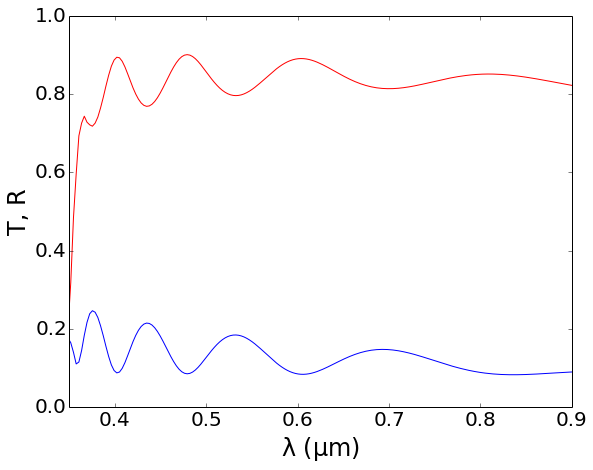

In [7]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)

ax.tick_params(labelsize = 20)
ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=24)
ax.set_ylabel('T, R', fontsize=24)

T = a.get_T()
R = a.get_R()
x = a.x

ax.plot(x, T, color='red')
ax.plot(x, R, color='blue')

ax.set_xlim([0.35, 0.9])
ax.set_ylim([0,1])
